In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd


In [2]:
# function to load shapfiles in as a geopandas object
def load_shape_file(filepath):
    """Loads the shape file desired to mask a grid.
    Args:
        filepath: Path to *.shp file
    """
    shpfile = gpd.read_file(filepath)
    return shpfile

In [3]:
#RGV_ecoreg= Rio Grande Valley Ecoregions
RGV_ecoreg = load_shape_file('C:\Bridgett\Bridgett\Introduction to Scientific computing\Everything\RGV_Ecoregions\RGV_Ecoregions.shp')
RGV_ecoreg.head() # .head gives you the first few lines, aka shapes

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry
0,1,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40311,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,380.00000,2700.0000,"POLYGON ((1653879 6904557, 1653869 6904557, 16..."
1,2,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40312,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,260.00000,1400.0000,"POLYGON ((1652969 6904537, 1652969 6904587, 16..."
2,3,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40375,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,291.84704,1682.2225,"POLYGON ((1655129 6903767.6097, 1655079 690377..."
3,4,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40447,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,1860.00000,36800.0000,"POLYGON ((1656909 6903857, 1656899 6903857, 16..."
4,5,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40472,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,160.00000,1300.0000,"POLYGON ((1656749 6903537, 1656749 6903517, 16..."


In [4]:
RGV_ecoreg['Veg_ID'].unique()


array([ 7004,  7005,  7103,  7104,  7105,  7107,  7204,  7205,  7207,
        7402,  7403,  7404,  7405,  7406,  7602,  7604,  7605,  7606,
        9000,  9007,  9104,  9106,  9124,  9187,  9304,  9307,  9410,
        9411,  9600, 10004, 10006, 10017,  7417,  2206,  2207,  5600,
        5605,  5617,  6307,  7407,  7802,  7804,  7805,  9107,  9128,
        9317,  5606,  5616,  6100,  6200,  6306,  6405,  6507,  6600,
        6610,  7305,  7306,  7307,  7502,  7700,  7707,  9204,  6806,
        7607,  6402,  6403,  6707,  9116], dtype=int64)

In [5]:
TMDT=[7004,7005]
TSG=[7103,7104,7105,7107]
TCT=[7204,7205,7207]
TF=[7402,7403,7404,7405,7406,7417,7407]
TR=[7602,7604,7605,7606,7607]
MNAMT=[9000,9007,9187,9600,9104,9106,9124,9107,9128,9116,9204]
AHRMT=[9304,9307,9410,9411,9317]
TCDW=[10004,10006,10017]
TSCP=[2206,2207]
TCSBTM=[5600,5605,5617,5606,5616]
RGDTWS=[7802,7804,7805]
TCB=[6100]
TCDCG=[6200,6306,6307]
SCPIW=[6507]
STSBTF=[6600,6610]
TL=[7305,7306,7307]
TPGRF=[7502]
TSL=[7700,7707]
TST=[6806]
CSTCFFW=[6402,6403,6405]
TCG=[6707]

In [6]:
df = []
Veg_ID = RGV_ecoreg['Veg_ID']

In [7]:
for i in Veg_ID:
    if i in TMDT:
        df.append('Tamaulipan Mixed Deciduous Thornscrub')
    elif i in TSG:
        df.append('Tamaulipan Savanna Grassland')
    elif i in TCT:
        df.append('Tamaulipan Calcareous Thornscrub')
    elif i in TF:
        df.append('Tamaulipan Floodplain')
    elif i in TR:
        df.append('Tamulipan Ramadero')
    elif i in MNAMT:
        df.append('Mainly Natural Azonal Mapped Types') 
    elif i in AHRMT:
        df.append('Agricultural and other Human-related Mapped Types')
    elif i in TCDW:
        df.append('Tamaulipan Closed Depression Wetland')
    elif i in TSCP:
        df.append('Texas Saline Coastal Prairie')
    elif i in TCSBTM:
        df.append('Texas Coast Salt and Brackish Tidal Marsh')
    elif i in RGDTWS:
        df.append('Rio Grande Delta Thorn Woodland and Shrubland')    
    elif i in TCB:
        df.append('Texas Coastal Beach')          
    elif i in TCDCG:
        df.append('Texas Coast Dune and Coastal Grassland') 
    elif i in SCPIW:
        df.append('Southeastern Coastal Plain Interdunal Wetland')        
    elif i in STSBTF:
        df.append('South Texas Salt and Brackish Tidal Flats')        
    elif i in TL:
        df.append('Tamaulipan Lomas')
    elif i in TPGRF:
        df.append('Tamaulipan Palm Grove Riparian Forest')
    elif i in TSL:
        df.append('Tamaulipan Saline Lake')        
    elif i in TST:
        df.append('Tamaulipan Saline Thornscrub')      
    elif i in CSTCFFW:
        df.append('Central and South Texas Coastal Fringe Forest and Woodland')
    elif i in TCG:
        df.append('Tamaulipan Caliche Grassland')
    else:
        df.append('NaN')

In [8]:
RGV_ecoreg['Major_Ecoregion'] = df
RGV_ecoreg.tail()

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry,Major_Ecoregion
268965,268966,7107,South Texas: Sandy Mesquite Savanna Grassland,15,0,0,R083CY463TX,LOAMY SAND PE 19-31,0,34d,Coastal Sand Plain,34,Western Gulf Coastal Plain,121102070008,8715.483683,586649.222118,"(POLYGON ((1696421 6964752.4355, 1696389.86960...",Tamaulipan Savanna Grassland
268966,268967,9307,Row Crops,9,0,0,R083CY480TX,SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,859.361519,15110.197319,"POLYGON ((1705419 6914631.1078, 1705419 691462...",Agricultural and other Human-related Mapped Types
268967,268968,9307,Row Crops,9,0,0,R083DY504TX,LAKEBED PE 19-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,597.590022,10608.125938,"POLYGON ((1724270 6914509.9858, 1724270 691450...",Agricultural and other Human-related Mapped Types
268968,268969,9307,Row Crops,9,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,778.370095,35481.894865,"POLYGON ((1732782 6914658, 1732782 6914638, 17...",Agricultural and other Human-related Mapped Types
268969,268970,9600,Open Water,21,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,3886.371293,328074.221869,"POLYGON ((1686069 6915037, 1686069 6915027, 16...",Mainly Natural Azonal Mapped Types


In [10]:
RGV_ecoreg['Major_Ecoregion'].unique()

array(['Tamaulipan Mixed Deciduous Thornscrub',
       'Tamaulipan Savanna Grassland', 'Tamaulipan Calcareous Thornscrub',
       'Tamaulipan Floodplain', 'Tamulipan Ramadero',
       'Mainly Natural Azonal Mapped Types',
       'Agricultural and other Human-related Mapped Types',
       'Tamaulipan Closed Depression Wetland',
       'Texas Saline Coastal Prairie',
       'Texas Coast Salt and Brackish Tidal Marsh',
       'Texas Coast Dune and Coastal Grassland',
       'Rio Grande Delta Thorn Woodland and Shrubland',
       'Texas Coastal Beach',
       'Central and South Texas Coastal Fringe Forest and Woodland',
       'Southeastern Coastal Plain Interdunal Wetland',
       'South Texas Salt and Brackish Tidal Flats', 'Tamaulipan Lomas',
       'Tamaulipan Palm Grove Riparian Forest', 'Tamaulipan Saline Lake',
       'Tamaulipan Saline Thornscrub', 'Tamaulipan Caliche Grassland'],
      dtype=object)

In [32]:
df2 = []

In [33]:
for i in Veg_ID:
    if i in TMDT:
        df2.append(0)
    elif i in TSG:
        df2.append(1)
    elif i in TCT:
        df2.append(2)
    elif i in TF:
        df2.append(3)
    elif i in TR:
        df2.append(4)
    elif i in MNAMT:
        df2.append(5)
    elif i in AHRMT:
        df2.append(6)
    elif i in TCDW:
        df2.append(7)
    elif i in TSCP:
        df2.append(8)
    elif i in TCSBTM:
        df2.append(9)
    elif i in RGDTWS:
        df2.append(10)
    elif i in TCB:
        df2.append(11)
    elif i in TCDCG:
        df2.append(12)
    elif i in SCPIW:
        df2.append(13)
    elif i in STSBTF:
        df2.append(14)
    elif i in TL:
        df2.append(15)
    elif i in TPGRF:
        df2.append(16)
    elif i in TSL:
        df2.append(17)
    elif i in TST:
        df2.append(18)
    elif i in CSTCFFW:
        df2.append(19)
    elif i in TCG:
        df2.append(20)      
    else:
        df2.append('NaN')


In [34]:
RGV_ecoreg['Maj_ER'] = df2
RGV_ecoreg.tail(n=10)

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry,Major_Ecoregion,Maj_ER
268960,268961,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,4804.657264,101363.203592,"POLYGON ((1684469 6920147.0001, 1684469 692013...",Agricultural and other Human-related Mapped Types,6
268961,268962,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,508.719023,5808.285643,"POLYGON ((1684639 6925007, 1684639 6924997, 16...",Agricultural and other Human-related Mapped Types,6
268962,268963,5605,Coastal: Sea Ox-eye Daisy Flats,11,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080800,580.000000,13900.000000,"POLYGON ((1755440 6914483, 1755440 6914473, 17...",Texas Coast Salt and Brackish Tidal Marsh,9
268963,268964,5617,Coastal: Salt and Brackish High Tidal Marsh,27,0,0,R150BY652TX,SALT MARSH PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,4066.640179,179933.064918,"POLYGON ((1762070 6915313, 1762070 6915293, 17...",Texas Coast Salt and Brackish Tidal Marsh,9
268964,268965,6600,South Texas: Wind Tidal Flats,1,0,0,R150BY651TX,SALT FLAT PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,1692.414009,23079.569882,"POLYGON ((1758870 6914803.0001, 1758870 691479...",South Texas Salt and Brackish Tidal Flats,14
268965,268966,7107,South Texas: Sandy Mesquite Savanna Grassland,15,0,0,R083CY463TX,LOAMY SAND PE 19-31,0,34d,Coastal Sand Plain,34,Western Gulf Coastal Plain,121102070008,8715.483683,586649.222118,"(POLYGON ((1696421 6964752.4355, 1696389.86960...",Tamaulipan Savanna Grassland,1
268966,268967,9307,Row Crops,9,0,0,R083CY480TX,SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,859.361519,15110.197319,"POLYGON ((1705419 6914631.1078, 1705419 691462...",Agricultural and other Human-related Mapped Types,6
268967,268968,9307,Row Crops,9,0,0,R083DY504TX,LAKEBED PE 19-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,597.590022,10608.125938,"POLYGON ((1724270 6914509.9858, 1724270 691450...",Agricultural and other Human-related Mapped Types,6
268968,268969,9307,Row Crops,9,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,778.370095,35481.894865,"POLYGON ((1732782 6914658, 1732782 6914638, 17...",Agricultural and other Human-related Mapped Types,6
268969,268970,9600,Open Water,21,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,3886.371293,328074.221869,"POLYGON ((1686069 6915037, 1686069 6915027, 16...",Mainly Natural Azonal Mapped Types,5


In [12]:
Maj_ER_Areas=np.arange(0,21)
Maj_ER_Areas

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [20]:
sum = 0

for ERn in np.arange(0,21):
    temp_sum = np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Maj_ER == ERn])
    print(temp_sum)
    sum = sum + temp_sum
    
print(sum)

618710590.5234846
2467283634.0686307
442216593.60378927
202253842.6212593
176501205.71520394
1821777320.1111965
3570055490.8441744
14993065.930600151
535730598.01641876
259509859.10961932
23215181.89602481
1637675.184440527
727464989.6193082
8874321.72110065
376455038.98037183
68358006.63592342
649159.5606464
13775125.11699649
159185608.99921954
107548892.23097286
16259767.161396649
11612455967.650776


In [26]:
2 &
+3

SyntaxError: invalid syntax (<ipython-input-26-baf8fc2801b4>, line 1)

In [14]:
618710590.5234846
+2467283634.0686307
+442216593.60378927
+202253842.6212593
+176501205.71520394
+1821777320.1111965
+3570055490.8441744
+14993065.930600151
+535730598.01641876
+259509859.10961932
+23215181.89602481
+1637675.184440527
+727464989.6193082
+8874321.72110065
+376455038.98037183
+68358006.63592342
+649159.5606464
+13775125.11699649
+159185608.99921954
+107548892.23097286
+16259767.161396649


16259767.161396649

The cell directly above didn't work because it was only returning the last number of what I was trying to add.

In [15]:
np.sum(RGV_ecoreg.Shape_Area)

11612455967.650782

The sum of the area in all the rows in the Maj_ER column should be the same of all the rows in the Shape_Area Column. Since it is not, there must be something wrong with my code. I cannot proceed until these areas add up.

In [16]:
Shape_Area=RGV_ecoreg.Shape_Area

In [17]:
Shape_Area.shape

(268970,)

In [18]:
RGV_ecoreg.Shape_Area.shape

(268970,)

In [27]:

sum

11612455967.650776

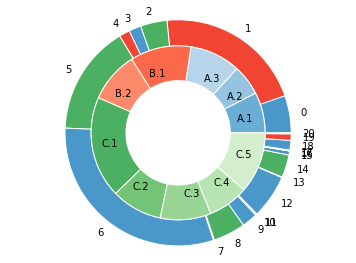

In [59]:
# Make data: I have 3 groups and 7 subgroups
group_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19','20']
group_size=[618710590.5234846, 2467283634.0686307, 442216593.60378927, 202253842.6212593, 176501205.71520394, 1821777320.1111965, 3570055490.8441744, 14993065.930600151, 535730598.01641876, 259509859.10961932, 23215181.89602481, 1637675.184440527, 727464989.6193082, 8874321.72110065, 376455038.98037183, 68358006.63592342, 649159.5606464, 13775125.11699649, 159185608.99921954, 107548892.23097286, 16259767.161396649]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

Now I need to do the same methods to obtain the areas for each subecoregion.

In [30]:
RGV_ecoreg['Veg_ID'].nunique()


68

In [35]:
RGV_ecoreg['Veg_ID'].unique()


array([ 7004,  7005,  7103,  7104,  7105,  7107,  7204,  7205,  7207,
        7402,  7403,  7404,  7405,  7406,  7602,  7604,  7605,  7606,
        9000,  9007,  9104,  9106,  9124,  9187,  9304,  9307,  9410,
        9411,  9600, 10004, 10006, 10017,  7417,  2206,  2207,  5600,
        5605,  5617,  6307,  7407,  7802,  7804,  7805,  9107,  9128,
        9317,  5606,  5616,  6100,  6200,  6306,  6405,  6507,  6600,
        6610,  7305,  7306,  7307,  7502,  7700,  7707,  9204,  6806,
        7607,  6402,  6403,  6707,  9116], dtype=int64)

In [43]:
df3 = []

In [51]:
7 is 7

True

In [50]:
'7' is 7

False

In [58]:
Veg_ID[0] == 7004

True

In [44]:
#I want to create a list starting from zero for each of the Veg_IDs.

for i in Veg_ID:
    if i = 7004:
        df3.append(0)
    if i is 7005:
        df3.append(1)
    if i is 7103:
        df3.append(2)
    if i is 7104:
        df3.append(3)
    if i is 7105:
        df3.append(4)
    if i is 7107:
        df3.append(5)
    if i is 7204:
        df3.append(6)
    if i is 7205:
        df3.append(7)
    if i is 7207:
        df3.append(8)
    if i is 7107:
        df3.append(9)
    if i is 7402:
        df3.append(10)
    if i is 7403:
        df3.append(11)
    if i is 7404:
        df3.append(12)
    if i is 7405:
        df3.append(13)
    if i is 7406:
        df3.append(14)
    if i is 7602:
        df3.append(15)
    if i is 7604:
        df3.append(16)
    if i is 7605:
        df3.append(17)
    if i is 7606:
        df3.append(18)
    if i is 9000:
        df3.append(19)
    if i is 9007:
        df3.append(20)
    if i is 9104:
        df3.append(21)
    if i is 9106:
        df3.append(22)
    if i is 9124:
        df3.append(23)
    if i is 9187:
        df3.append(24)
    if i is 9304:
        df3.append(25)
    if i is 9307:
        df3.append(26)
    if i is 9410:
        df3.append(27)
    if i is 9411:
        df3.append(28)
    if i is 9600:
        df3.append(29)
    if i is 10004:
        df3.append(30)
    if i is 10006:
        df3.append(31)
    if i is 10017:
        df3.append(32)
    if i is 7417:
        df3.append(33)
    if i is 2206:
        df3.append(34)   
    if i is 2207:
        df3.append(35)
    if i is 5600:
        df3.append(36)
    if i is 5605:
        df3.append(37)
    if i is 5617:
        df3.append(38)
    if i is 6307:
        df3.append(39)
    if i is 7407:
        df3.append(40)   
    if i is 7802:
        df3.append(41)
    if i is 7804:
        df3.append(42)
    if i is 7805:
        df3.append(43)
    if i is 9107:
        df3.append(44)
    if i is 9128:
        df3.append(45)
    if i is 9317:
        df3.append(46)
    if i is 5606:
        df3.append(47)
    if i is 5616:
        df3.append(48)
    if i is 6100:
        df3.append(49)
    if i is 6200:
        df3.append(50)
    if i is 6306:
        df3.append(51)
    if i is 6405:
        df3.append(52)
    if i is 6507:
        df3.append(53)
    if i is 6600:
        df3.append(54)
    if i is 6610:
        df3.append(55)
    if i is 7305:
        df3.append(56)
    if i is 7306:
        df3.append(57)
    if i is 7307:
        df3.append(58)
    if i is 7502:
        df3.append(59)
    if i is '7700:
        df3.append(60)
    if i is 7707:
        df3.append(61)
    if i is 9204:
        df3.append(62)
    if i is 6806:
        df3.append(63)
    if i is 7607:
        df3.append(64)
    if i is 6402:
        df3.append(65)
    if i is 6403:
        df3.append(66)
    if i is 6707:
        df3.append(67)
    if i is 9116:
        df3.append(68)
    else:
        df3.append('NaN')


In [45]:
RGV_ecoreg['Sub_ER'] = df3
RGV_ecoreg.tail(n=10)

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry,Major_Ecoregion,Maj_ER,Sub_ER
268960,268961,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,4804.657264,101363.203592,"POLYGON ((1684469 6920147.0001, 1684469 692013...",Agricultural and other Human-related Mapped Types,6,1
268961,268962,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,508.719023,5808.285643,"POLYGON ((1684639 6925007, 1684639 6924997, 16...",Agricultural and other Human-related Mapped Types,6,1
268962,268963,5605,Coastal: Sea Ox-eye Daisy Flats,11,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080800,580.000000,13900.000000,"POLYGON ((1755440 6914483, 1755440 6914473, 17...",Texas Coast Salt and Brackish Tidal Marsh,9,1
268963,268964,5617,Coastal: Salt and Brackish High Tidal Marsh,27,0,0,R150BY652TX,SALT MARSH PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,4066.640179,179933.064918,"POLYGON ((1762070 6915313, 1762070 6915293, 17...",Texas Coast Salt and Brackish Tidal Marsh,9,1
268964,268965,6600,South Texas: Wind Tidal Flats,1,0,0,R150BY651TX,SALT FLAT PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,1692.414009,23079.569882,"POLYGON ((1758870 6914803.0001, 1758870 691479...",South Texas Salt and Brackish Tidal Flats,14,1
268965,268966,7107,South Texas: Sandy Mesquite Savanna Grassland,15,0,0,R083CY463TX,LOAMY SAND PE 19-31,0,34d,Coastal Sand Plain,34,Western Gulf Coastal Plain,121102070008,8715.483683,586649.222118,"(POLYGON ((1696421 6964752.4355, 1696389.86960...",Tamaulipan Savanna Grassland,1,1
268966,268967,9307,Row Crops,9,0,0,R083CY480TX,SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,859.361519,15110.197319,"POLYGON ((1705419 6914631.1078, 1705419 691462...",Agricultural and other Human-related Mapped Types,6,1
268967,268968,9307,Row Crops,9,0,0,R083DY504TX,LAKEBED PE 19-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,597.590022,10608.125938,"POLYGON ((1724270 6914509.9858, 1724270 691450...",Agricultural and other Human-related Mapped Types,6,1
268968,268969,9307,Row Crops,9,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,778.370095,35481.894865,"POLYGON ((1732782 6914658, 1732782 6914638, 17...",Agricultural and other Human-related Mapped Types,6,1
268969,268970,9600,Open Water,21,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,3886.371293,328074.221869,"POLYGON ((1686069 6915037, 1686069 6915027, 16...",Mainly Natural Azonal Mapped Types,5,1


This is not the result I wanted. I want each of the Veg_IDs to have their own Sub_ER index that starts at zero. There must be an issue in the = statement of the for loop.

In [47]:
df4=[]

In [46]:
for i in Veg_ID:
    if i = 7004:
        df4.append(0)

SyntaxError: invalid syntax (<ipython-input-46-83bda0034199>, line 2)

In [27]:
df4=[]

In [28]:
for i in Veg_ID:
    if i == 7004:
        df4.append(0)

In [29]:
df4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
Veg_ID[0] == 7004

True

If you want to get the values that are 7004, you need to put == instead of is because we are working with logical operations